In [9]:
import pandas as pd
import numpy as np
%config Completer.use_jedi = False
import matplotlib as mpl
mpl.rcParams['figure.dpi'] = 85

<AxesSubplot:>

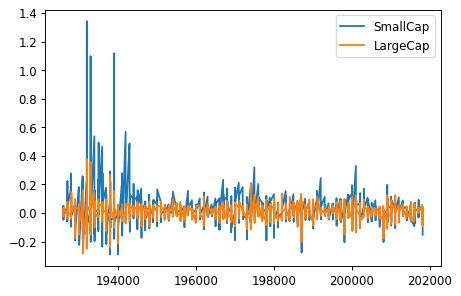

In [10]:
me_m = pd.read_csv("data/Portfolios_Formed_on_ME_monthly_EW.csv",header=0,index_col=0,parse_dates=True,na_values=-99.99)

rets = me_m[['Lo 10','Hi 10']]
rets.columns = ['SmallCap','LargeCap']
rets = rets/100
rets.plot()

<AxesSubplot:>

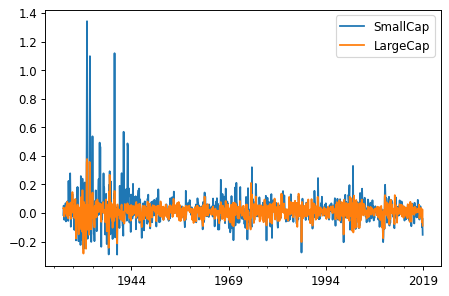

In [11]:
rets.index = pd.to_datetime(rets.index, format = '%Y%m')
rets.plot()

In [12]:
rets.index = rets.index.to_period('m')

In [13]:
rets.head()

,SmallCap,LargeCap
1926-07,-0.0145,0.0329
1926-08,0.0512,0.0370
1926-09,0.0093,0.0067
1926-10,-0.0484,-0.0243
1926-11,-0.0078,0.0270


## Compute Drawdowns

1. compute wealth index
2. compute previous peaks
3. compute drawdowns - wealth value as percent of previous peak

<AxesSubplot:>

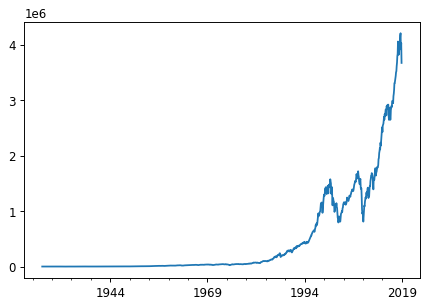

In [14]:
wealth_index = 1000 * (1 + rets["LargeCap"]).cumprod()
wealth_index.plot()

<AxesSubplot:>

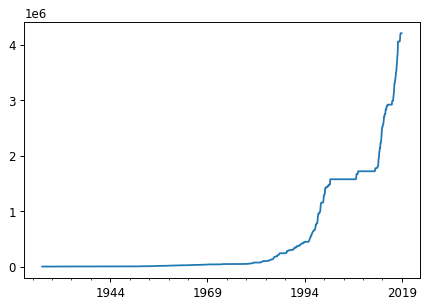

In [15]:
prev_peaks = wealth_index.cummax()
prev_peaks.plot()

<AxesSubplot:>

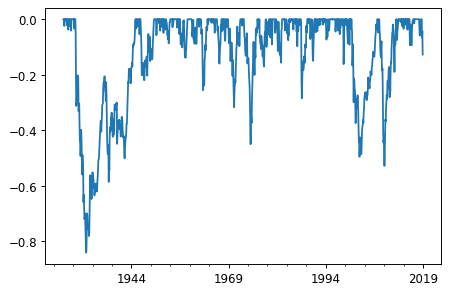

In [16]:
drawdown = (wealth_index - prev_peaks)/prev_peaks
drawdown.plot()

In [17]:
drawdown.head()

1926-07    0.0000
1926-08    0.0000
1926-09    0.0000
1926-10   -0.0243
1926-11    0.0000
Freq: M, Name: LargeCap, dtype: float64

In [21]:
drawdown["1975":].min()

-0.5280945042309304

In [22]:
drawdown["1975":].idxmin()

Period('2009-02', 'M')

In [23]:
drawdown.idxmin()

Period('1932-05', 'M')

In [29]:
def drawdown(return_series: pd.Series):
    """    
    Takes a time series of asset returns
    Computes and returns a dataframe that contains:
    the wealth index
    the previous peaks
    percent drawdowns
    """
    
    wealth_index = 1000 * (1 + return_series).cumprod()
    previous_peaks = wealth_index.cummax()
    drawdowns = (wealth_index - previous_peaks)/previous_peaks
    
    result = pd.DataFrame({
        'Wealth': wealth_index,
        'Peaks': previous_peaks,
        "Drawdown":drawdowns
                          })
    
    
    return result

In [31]:
drawdown(rets["LargeCap"])

,Drawdown,Peaks,Wealth
1926-07,0.000000,1.032900e+03,1.032900e+03
1926-08,0.000000,1.071117e+03,1.071117e+03
1926-09,0.000000,1.078294e+03,1.078294e+03
1926-10,-0.024300,1.078294e+03,1.052091e+03
1926-11,0.000000,1.080498e+03,1.080498e+03
1926-12,0.000000,1.113021e+03,1.113021e+03
1927-01,-0.004300,1.113021e+03,1.108235e+03
1927-02,0.000000,1.148685e+03,1.148685e+03
1927-03,0.000000,1.158449e+03,1.158449e+03
1927-04,0.000000,1.168875e+03,1.168875e+03


In [32]:
drawdown(rets["LargeCap"])[["Wealth","Peaks"]].head()

,Wealth,Peaks
1926-07,1032.900000,1032.900000
1926-08,1071.117300,1071.117300
1926-09,1078.293786,1078.293786
1926-10,1052.091247,1078.293786
1926-11,1080.497711,1080.497711


<AxesSubplot:>

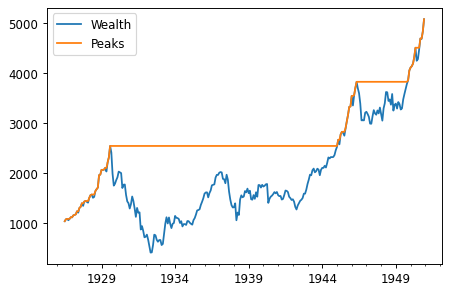

In [36]:
drawdown(rets[:"1950"]["LargeCap"])[["Wealth","Peaks"]].plot()

<AxesSubplot:>

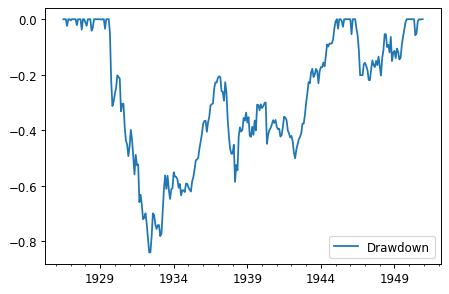

In [39]:
drawdown(rets[:"1950"]["LargeCap"])[["Drawdown"]].plot()

In [42]:
print(drawdown(rets[:"1950"]["LargeCap"])[["Drawdown"]].idxmin())
print(drawdown(rets[:"1950"]["SmallCap"])[["Drawdown"]].idxmin())

Drawdown   1932-05
dtype: object
Drawdown   1932-05
dtype: object
